In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
sns.set_style("darkgrid")
sns.set_theme(font_scale = 1, palette= "crest")

### Importing the Data

The data is comma seperated, and the raw data being read from absolulute directory /data/raw/

In [63]:
df = pd.read_csv("../data/raw/autoscout24-germany-dataset.csv")

display(df)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


### Cleaning Data

The data is 99.3% complete, but unfortunately there are 334 rows (out of 46405 rows) that contain incomplete information about the vehicle.
- Mileage, make, fuel, offerType, price, and year contain complete information.
- 143 rows contain missing vehicle model, for these cases I am going to replace the blank space with "Unknown" since the data associated with the vehicle is still valuable even if the model is unkown.
- 182 rows contain missing transmission information, these will be dropped since this column will be converted to a numeric later.
- 29 vehicles are missing their horsepower, I am going to delete these few rows since they are inconsequencial compared to the size of the data set and provide little use with such an impactful metric missing
- There are 23 vehicles with brand "Others", these vehicles provide no insight into make/model or any other correlations that can be drawn thus they are dropped from the dataframe.
- In between each of the row drop operations, the row index's are re-indexed from 0 for the next row drop operation.
- I find "gear" a little odd, I prefer to use "transmission" so I am going to rename the column.

In [88]:
df = pd.read_csv("../data/raw/autoscout24-germany-dataset.csv")

df["model"] = df["model"].fillna("Unknown")

df = df.drop(df[df["gear"].isna()].index)

df = df.reset_index()
df = df.drop("index", axis = "columns")

df = df.drop(df[df["hp"].isna()].index)

df = df.reset_index()
df = df.drop("index", axis = "columns")

df = df.drop(df[df["make"] == "Others"].index)

df = df.reset_index()
df = df.drop("index", axis = "columns")

df["transmission"] = df["gear"]
df = df.drop("gear", axis = "columns")

df = df[["mileage", "make", "model", "fuel", "transmission", "offerType", "price", "hp", "year"]]

display(df)

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46175,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46176,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46177,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46178,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


### DataFrame from external script

This section is the same content as the previous, except all of the methods called are wrapped into one method chain that are avaliable in an external python file.

In [89]:
from scripts import project_functions as projf
import importlib
importlib.reload(projf)

df = projf.load_and_process("../data/raw/autoscout24-germany-dataset.csv")
display(df)

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46106,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46107,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46108,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46109,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


# Exploratory Data Analysis

### Feel for the variables

First I find the size of the dataset. Then take a peak at the first 5 rows of the dataframe, and print the column names.

In [90]:
display(df.shape, df.head(), df.columns)

(46111, 9)

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


Index(['mileage', 'make', 'model', 'fuel', 'transmission', 'offerType',
       'price', 'hp', 'year'],
      dtype='object')

Now to get a better sense of the values that the columns take I use the describe method on the dataframe. Split by first numerical columns, then by categoriacal columns.

Notice there is a car with 1 horsepower which is certaintly an error, this should be further explored

In [91]:
display(df.describe().T.apply(lambda s: s.apply('{0:.1f}'.format)), df.describe(exclude=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
mileage,46111.0,71216.4,62453.7,0.0,19878.0,60000.0,105000.0,1111111.0
price,46111.0,16599.7,19344.0,1100.0,7490.0,11000.0,19490.0,1199900.0
hp,46111.0,133.2,75.5,1.0,86.0,116.0,150.0,850.0
year,46111.0,2016.0,3.2,2011.0,2013.0,2016.0,2019.0,2021.0


,count,unique,top,freq
make,46111,72,Volkswagen,6911
model,46001,834,Golf,1489
fuel,46111,9,Gasoline,28779
transmission,46111,3,Manual,30302
offerType,46111,5,Used,39865


In [92]:
display(df[df["hp"] < 50])

,mileage,make,model,fuel,transmission,offerType,price,hp,year
1974,21800,Microcar,Due,Diesel,Automatic,Used,8490,5.0,2017
3486,39500,9ff,NaN,Gasoline,Manual,Used,7000,20.0,2018
6141,42500,smart,forTwo,Electric,Automatic,Used,6900,48.0,2014
7044,18137,Ligier,JS 50,Diesel,Automatic,Used,9950,5.0,2016
7554,5,Aixam,City,Diesel,Automatic,Used,17370,8.0,2021
...,...,...,...,...,...,...,...,...,...
41049,9304,Renault,Twizy,Electric,Automatic,Used,4990,11.0,2017
41080,20600,Microcar,M.Go,Diesel,Automatic,Used,9300,8.0,2017
43021,250,Estrima,Birò,Electric,Automatic,Used,12590,5.0,2019
43176,200,Estrima,Birò,Electric,Automatic,Used,13590,5.0,2019


61 rows in the dataframe contain rows with vehicles that have less than 50 horsepower. Realistically, a vehicle produced between 2011-2021 will not have below 50 HP. For this reason, these rows provide unrealiable information and will be dropped below, then re-indexed row-wise.

In [93]:
df = df.drop(df[df["hp"] < 50].index)
df.reset_index(drop = "true")

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46045,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46046,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46047,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46048,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


Now lets look at the numeric column description against to see the updated means. We find the new minimum horsepower is 54 which seems on par for a very small and weak car engine.

In [94]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
mileage,46050.0,71268.647970,62469.856506,0.0,19900.0,60000.0,105006.75,1111111.0
price,46050.0,16610.693051,19353.730396,1100.0,7495.0,11000.0,19499.00,1199900.0
hp,46050.0,133.321433,75.388473,54.0,86.0,116.0,150.00,850.0
year,46050.0,2016.014354,3.156014,2011.0,2013.0,2016.0,2019.00,2021.0


Next thing to do is form a correlation matrix to show the correlation coeficcients between each numeric variable.

[Text(0.5, 1.0, 'Correlation Matrix')]

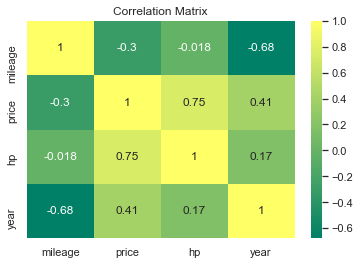

In [95]:
corr = df.corr()
plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap = "summer")
plot.set(title = "Correlation Matrix")

It seems as if there is a positive correlation between price and horsepower which makes sense since a more powerful enginer requires additional engineering, and stronger/more expensive materials which will drive up the price. Price and year also have a positive correlation which makes sense since new vehicles have not depreciated and thus will typically cost more. There is a strong negative correlation between year and mileage which also is intuitive since new vehicles will have less time to be driven resulting in less accumulated kilometers. Price and mileage also have a negative correlation, this comes natural as a high mileage vehicle is less desirable for reliability reasons, thus the price is driven down.

To complete the correlation matrix above, a pairplot will be generated which will in turn generate a scatterplot between each variable in the dataframe. This is another method to confirm the correlation between the variables.

<Figure size 1440x720 with 0 Axes>

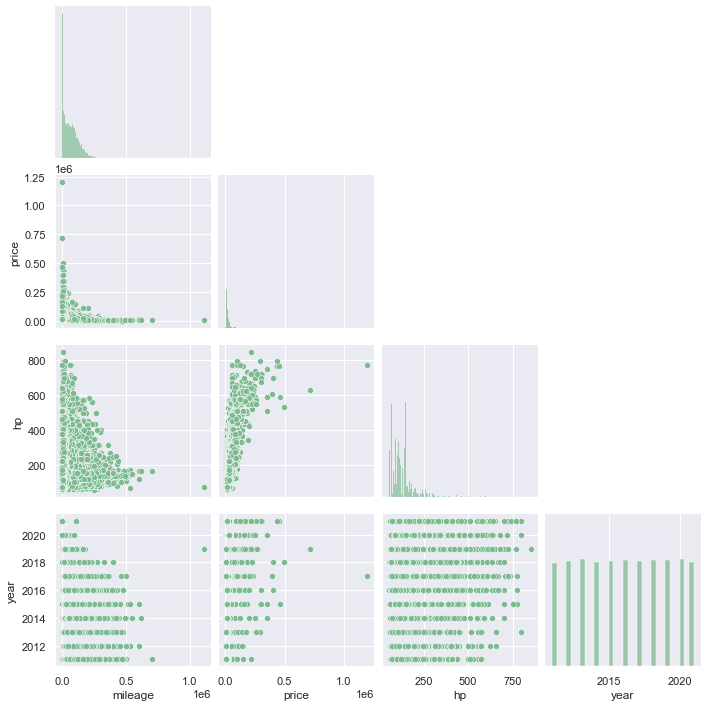

In [96]:
plt.figure(figsize=(20, 10))
sns.pairplot(df, corner = True)

The same conclusions can be drawn as from the correlation matrix. In particular, the price-mileage negative correlation is extremely clear. It is also interesting to note that vehicles tend to have lower HP, price, and mileage, while cars are distributed farily evenly across the years.

The next step during exploration is to inspect the categorical variables, the first plot to be inspected is a boxplot of the transmission with a strip plot overlayed on it. 

<AxesSubplot:xlabel='price', ylabel='transmission'>

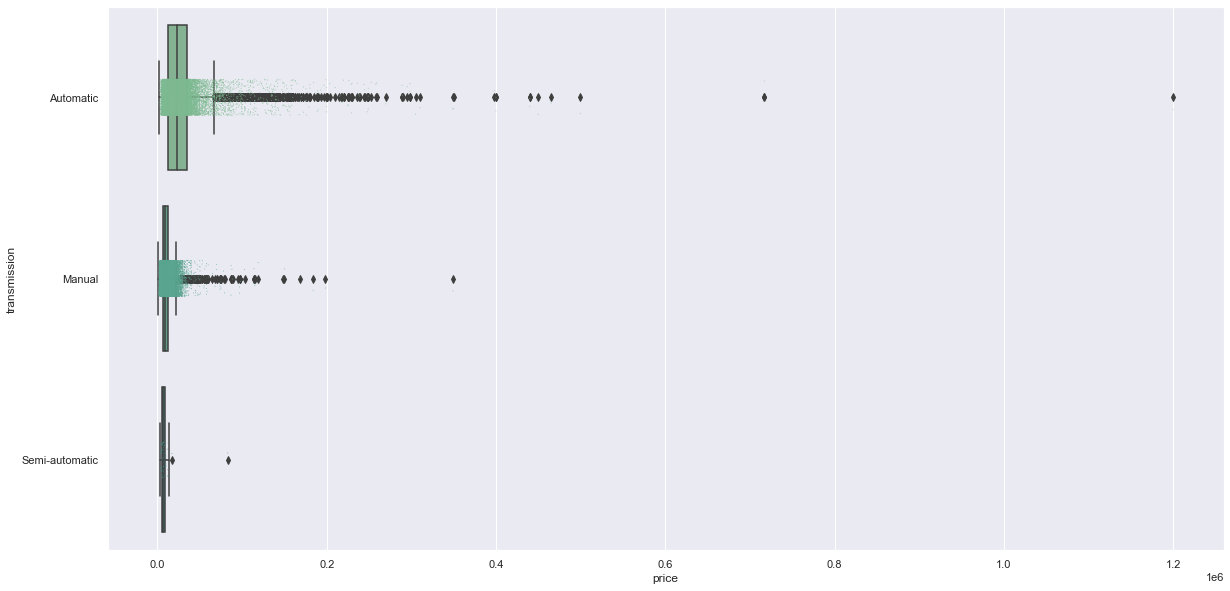

In [97]:
plt.figure(figsize=(20, 10))
ordered = df.groupby('transmission').median().sort_values('price', ascending=False)["price"].index
sns.boxplot(y="transmission", x="price", data=df, order = ordered)
sns.stripplot(y = "transmission", x = "price", data = df, size=1, alpha = 0.7, order = ordered)

As seen above, the price of a vehicle with automatic transition skews higher than that of a manual transmission. Not only is the mean of the automatic transition price higher then the other options, it also has much higher upper bounds then the other options. 

The final plot of interest is a plot of the median price of each vehicle in descending order on the x axis.

<AxesSubplot:title={'center':'Mean price of vehicles by brand'}, xlabel='Make', ylabel='Price'>

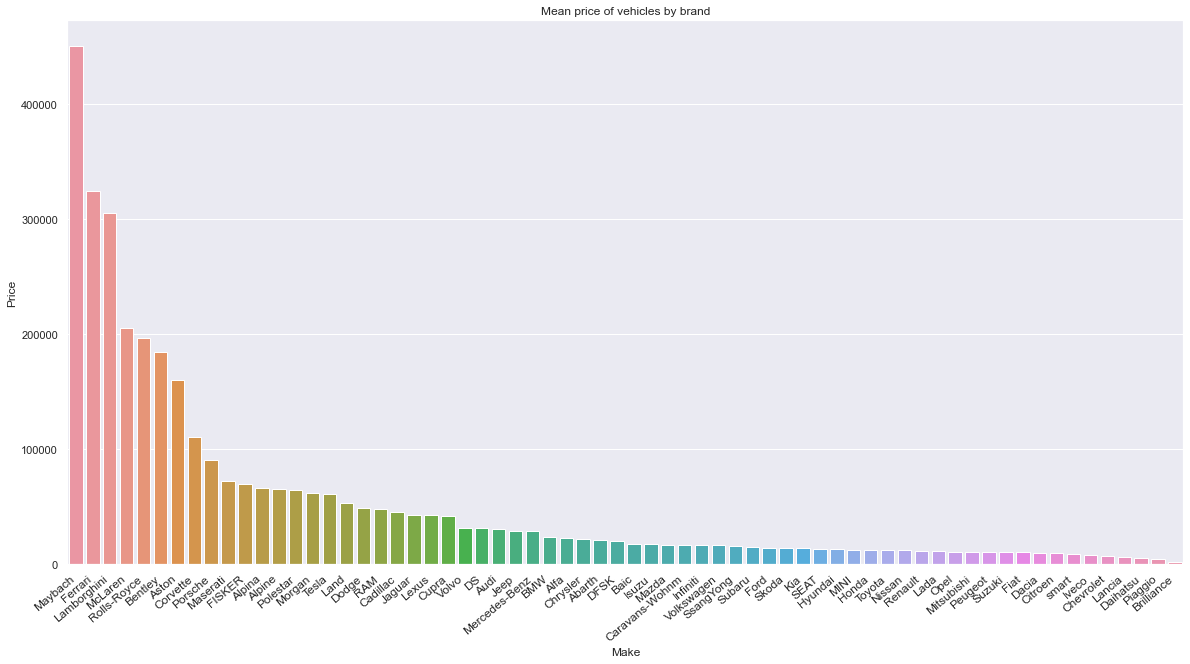

In [98]:
plt.figure(figsize=(20, 10))
make_price = df.groupby("make")["price"].mean().reset_index().sort_values('price', ascending=False)
plot = sns.barplot(x = "make", y = "price", data = make_price)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plot.set(title="Mean price of vehicles by brand", xlabel="Make", ylabel="Price")
plot

The plot above gives insight into the value of brands vehicles. Unsuprisingly, luxury brands such as Maybach, Gerrari, etc. rank by far higher then other vehicles. It is interesting to note that after the first ~15 luxury brands, the price tailors off and the price remains largely constant throughout to the end. It is clear there is a large discrepency between a few luxury brands, and the rest of the brands for common folk.

## Conducting Analysis

I am interested in conducting an analysis in order to find which vehicle attributes effect the price greatest. This information is useful when car shopping as general rules make it easy to see if a car's price is fair.

The first visualization I want to see is a jointplot for each numeric columns versus price overalyed with a linear regression fit line. It should be apparent which regression lines are the steepest; this will give insight into correlation between numerical variables. From the plot below, it seems as if mileage has a very negative correlation with price, while hp has a positive correlation with price. Year also has a slight correlation with price; in that newer cars have a higher price, albeit this correlation is much more shallow then hp.

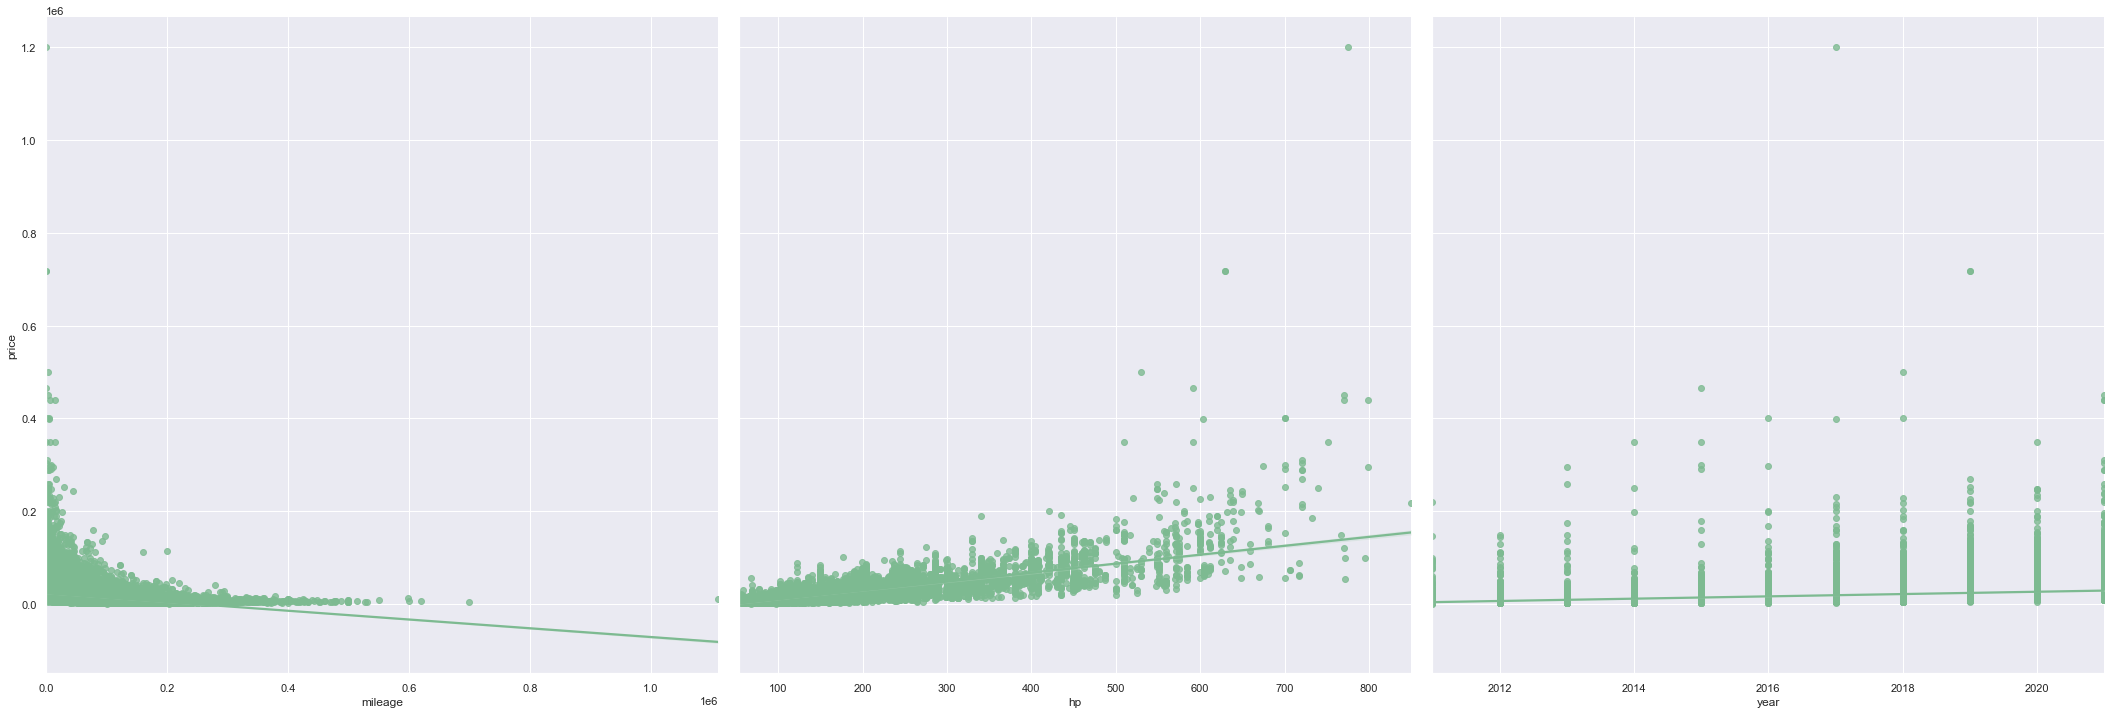

In [99]:
g = sns.PairGrid(df, y_vars=["price"], x_vars=["mileage", "hp", "year"], height=10)
g.map(sns.regplot)

Since horsepower has the largest positive correlation on the price of a vehicle, I want to explore which brands make on average the highest horsepower vehicles.

<AxesSubplot:title={'center':'Mean HP of vehicles by brand'}, xlabel='Make', ylabel='Horsepower'>

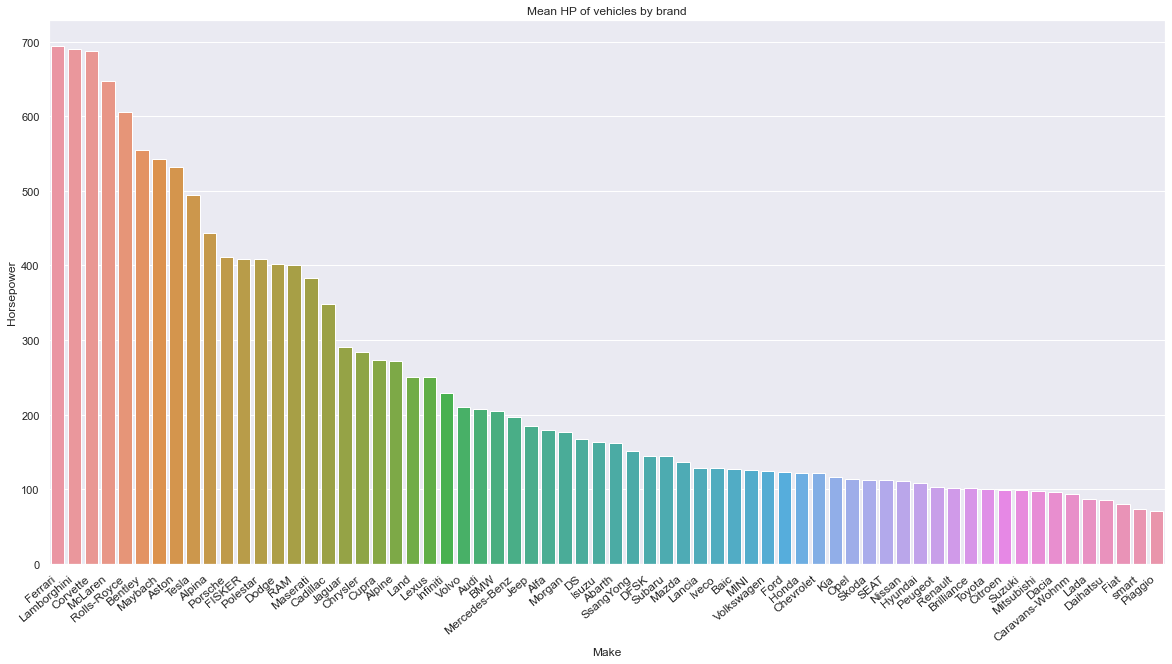

In [100]:
plt.figure(figsize=(20, 10))
make_hp = df.groupby("make")["hp"].mean().reset_index().sort_values('hp', ascending=False)
plot = sns.barplot(x = "make", y = "hp", data = make_hp)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plot.set(title="Mean HP of vehicles by brand", xlabel="Make", ylabel="Horsepower")
plot

Now, in order to see how well the HP correlates to price, I am going to plot the order generated from the plot above, except replace the y-axis with the price of the vehicles. If there is a correlation it should show a similar decrease from left to right in the x direction. 

C:\Users\jared\AppData\Local\Temp/ipykernel_7244/894971000.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_price = df.groupby("make")["price", "hp"].mean().reset_index().sort_values('hp', ascending=False)


<AxesSubplot:title={'center':'Mean price of vehicles by brand'}, xlabel='Make', ylabel='Price'>

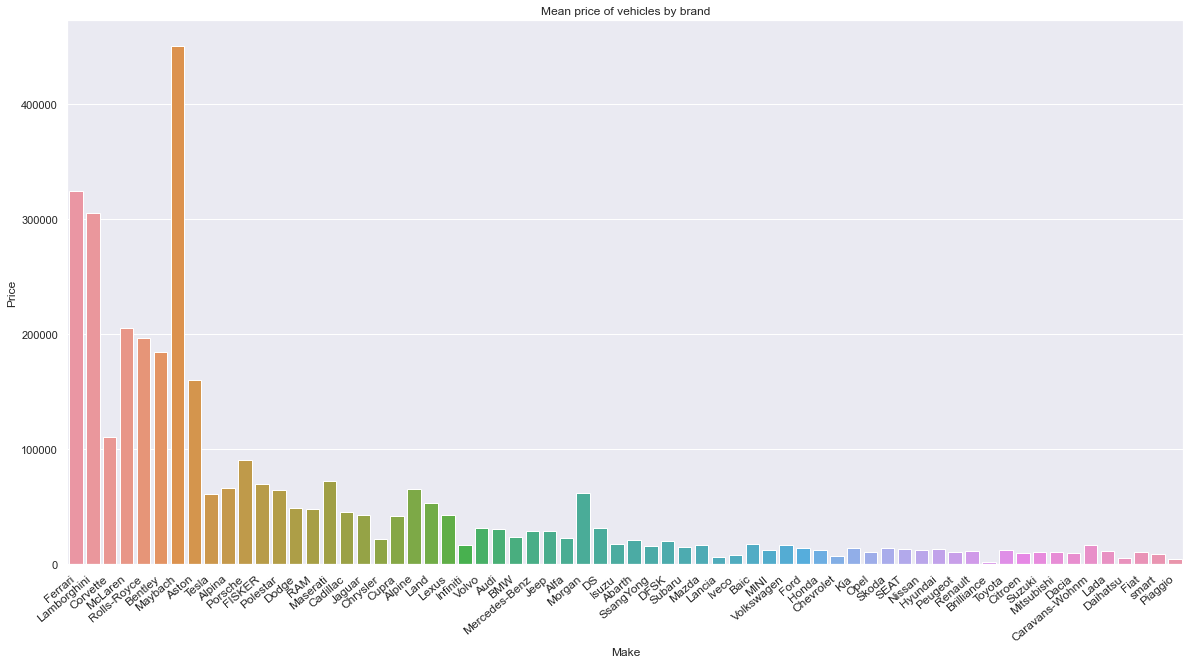

In [101]:
plt.figure(figsize=(20, 10))
make_price = df.groupby("make")["price", "hp"].mean().reset_index().sort_values('hp', ascending=False)
plot = sns.barplot(x = "make", y = "price", data = make_price)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right", fontsize=12)
plot.set(title="Mean price of vehicles by brand", xlabel="Make", ylabel="Price")
plot

As expected, the plot shows that cars with higher horsepower also tend to price higher. Note that their are some outliers which is to be expected. Take corvette for instance, they produce high power vehicles but they lack all of the luxury features you would find in a Rolls-Royce, thus they have higher power but a lower price. Beyond a few counter examples, the price decreases as the horsepower tapers off.

Now I want to make a barplot for the median price of vehicles by year, this will make it easier to visualize how the price of vehicles are changing each year.

<AxesSubplot:title={'center':'Mean price of vehicles by year'}, xlabel='Year', ylabel='Price'>

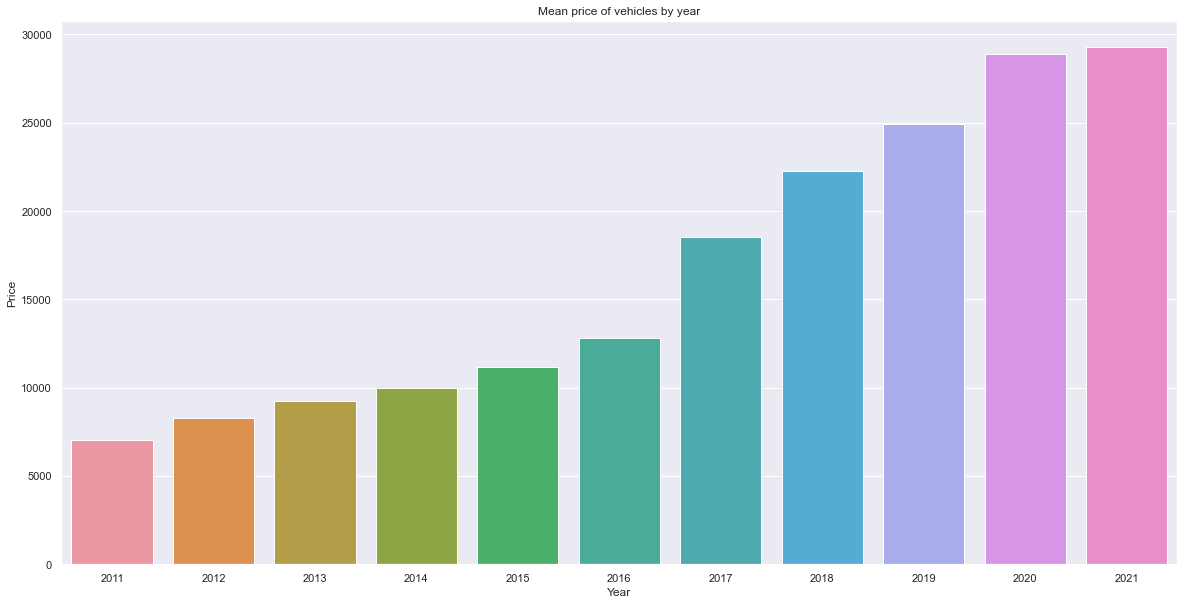

In [102]:
plt.figure(figsize=(20, 10))
make_price = df.groupby("year")["price"].mean().reset_index()
plot = sns.barplot(x = "year", y = "price", data = make_price)
plot.set(title="Mean price of vehicles by year", xlabel="Year", ylabel="Price")
plot

This plot really makes clear the increase in price of vehicles the newer that they are. 2021 vehicles are about five times more pricey compared to a 2011 counterpart.

Now I want to explore the difference that fuel type makes on the price of a vehicle. Instinctually you would expect electric vehicles to be more expensive since they are new, and manufacturing has not yet met the desires of buyers. Lets plot the price of vehicles by fuel type.

<AxesSubplot:title={'center':'Mean price of vehicles by fuel type'}, xlabel='Fuel Type', ylabel='Price'>

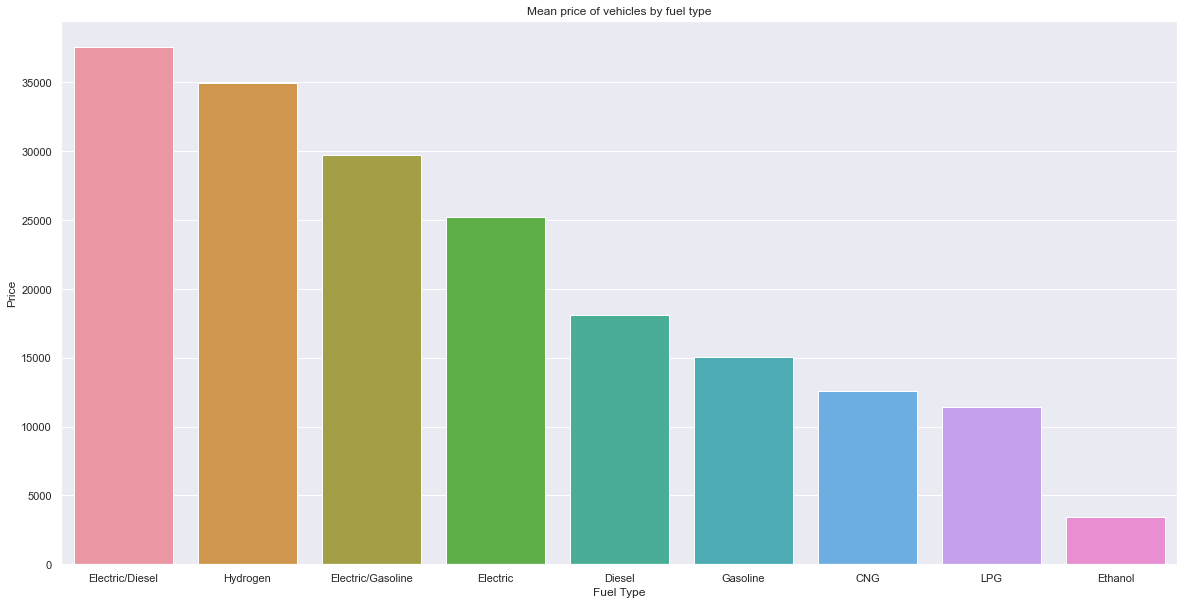

In [105]:
plt.figure(figsize=(20, 10))
make_price = df.groupby("fuel")["price"].mean().reset_index().sort_values('price', ascending=False)
plot = sns.barplot(x = "fuel", y = "price", data = make_price)
plot.set(title="Mean price of vehicles by fuel type", xlabel="Fuel Type", ylabel="Price")
plot

These results are to be expected, new technology demands a higher price and the plot above illustrates this well. Fossil fueled vehicles are in turn much cheaper, the lowest being compressed natural gas, liquefied petrolem gas, and ethanol. It is important to note these fuel types are for small, less powerful vehicles which coresponds to a lower price. Being said, by choosing an old fuel type the price of a vehicle is typically cut drastically.

For this analysis, I am not considering the offerType column.The offerType column does not provide any insight into the vehicle, or what can be expected when purchasing a vehicle that is used, demonstration, re-registered, etc. Additionally the most common value taken in the column is used, which dominates the number of other cars; thus the analysis is not very generalizable. The table below illustrates this point nicely.

In [115]:
df.groupby("offerType").count()

,mileage,make,model,fuel,transmission,price,hp,year
offerType,,,,,,,,
Demonstration,2347,2347,2340,2347,2347,2347,2347,2347
Employee's car,1119,1119,1117,1119,1119,1119,1119,1119
New,13,13,13,13,13,13,13,13
Pre-registered,2762,2762,2759,2762,2762,2762,2762,2762
Used,39809,39809,39713,39809,39809,39809,39809,39809


Finally, I want to generate a violin plot to examine the price difference accross the various transmission avaliable in the vehicles. Clearly from the plot below, automatic vehicles are more expensive then its manual counterpart. 

(-10000.0, 80000.0)

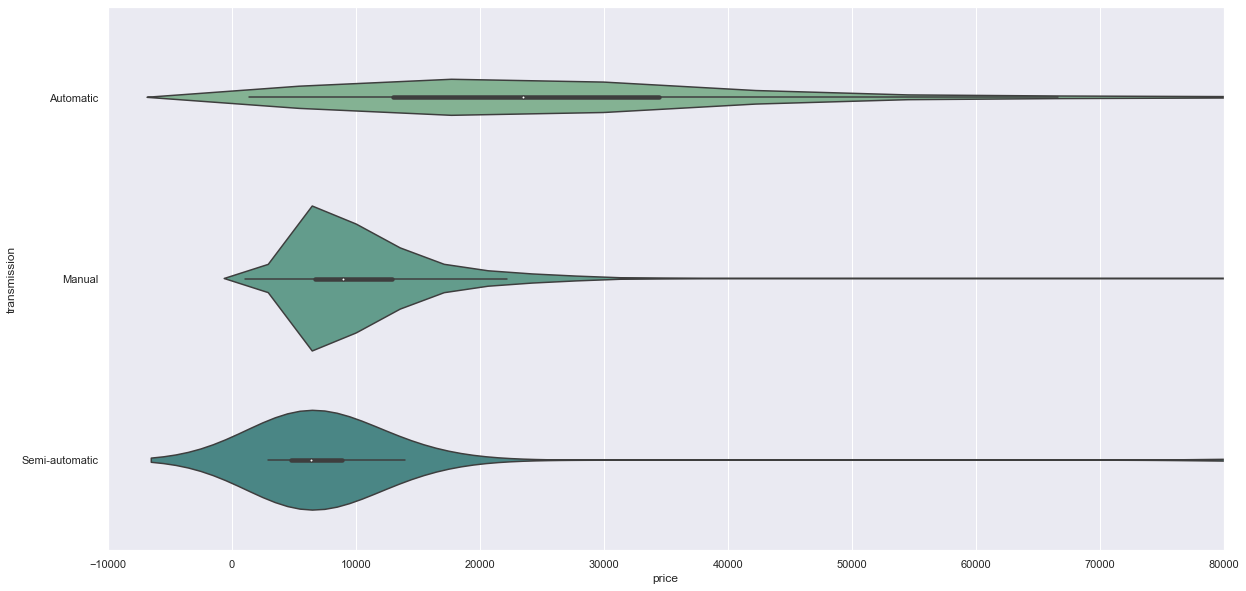

In [163]:
plt.figure(figsize=(20, 10))
ordered = df.groupby('transmission').median().sort_values('price', ascending=False)["price"].index
plot = sns.violinplot(y="transmission", x="price", data=df, order = ordered)
plot.set_xlim(left=-10000, right=80000)

Now I want to generate another correlation matrix to compare with the outcomes we found above.

[Text(0.5, 1.0, 'Correlation Matrix')]

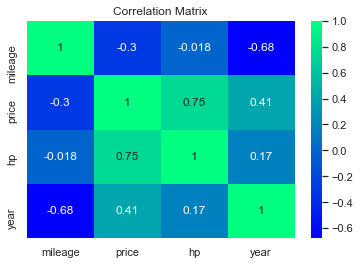

In [153]:
corr = df.corr()
plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap = "winter")
plot.set(title = "Correlation Matrix")

This correlation plot shows all of the outcomes that were discovered in the analysis. Firstly, horsepower has the largest positive correlation with the price; meaning that high horsepower vehicles seemingly cost more. Next is a positive correlation between price and year which was discovered above as well; the newer the vehicle the more expensive it seems to be. Finally there is a negative correlation between mileage and price; wherin high mileage vehicles tend to cost more then low mileage vehicles.

Then by examining the categorical variables above, vehicles with new fuel technology are far more expensive then proven options such as diesel, and gasoline. Additionally, vehicles with automatic transmission price much higher then a manual counterpart. Finally, brand *can* make the biggest difference when considering a vehicles price, or *can* make little difference. Vehicles with luxury brands associated with them are much more expensive then standard alternatives. 

In conclusion, when shopping for a vehicle and looking to maintain a budget aim for an older vehicle that has accumulated some miles. Most importatently, however, stay away from luxury brands, or common brands that have a model with high horsepower as those factors effect the price of a car the greatest. Transmission is a matter of preference, but be ready to pay more for an automatic vehicle comapred to manual. Finally, gasoline or diesel is a great option to keep the price down, but if you are a forward thinking and want an electric vehicle to move with the changing society: you better be ready to pay for it.